# A tale of two variables


In [1]:
import pandas as pd

taiwan_real_estate = pd.read_csv("data/taiwan_real_estate2.csv")

taiwan_real_estate.head()


,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


price va a ser la variable respuesta

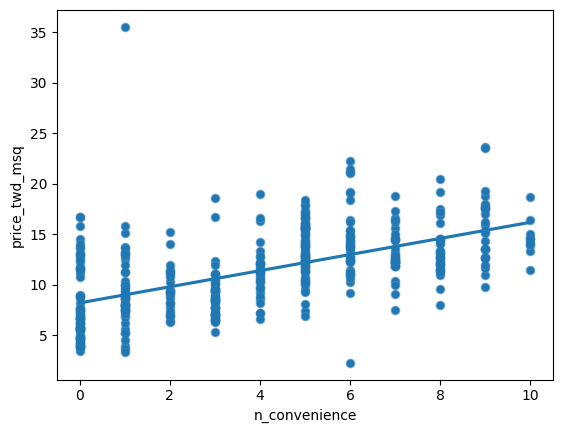

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data= taiwan_real_estate, x='n_convenience',y='price_twd_msq')
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=False,
         scatter_kws={'alpha': 0.5})
plt.show()

# Fitting a linear regression

In [5]:
from statsmodels.formula.api import ols

mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data= taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


# Categorical explanatory variables

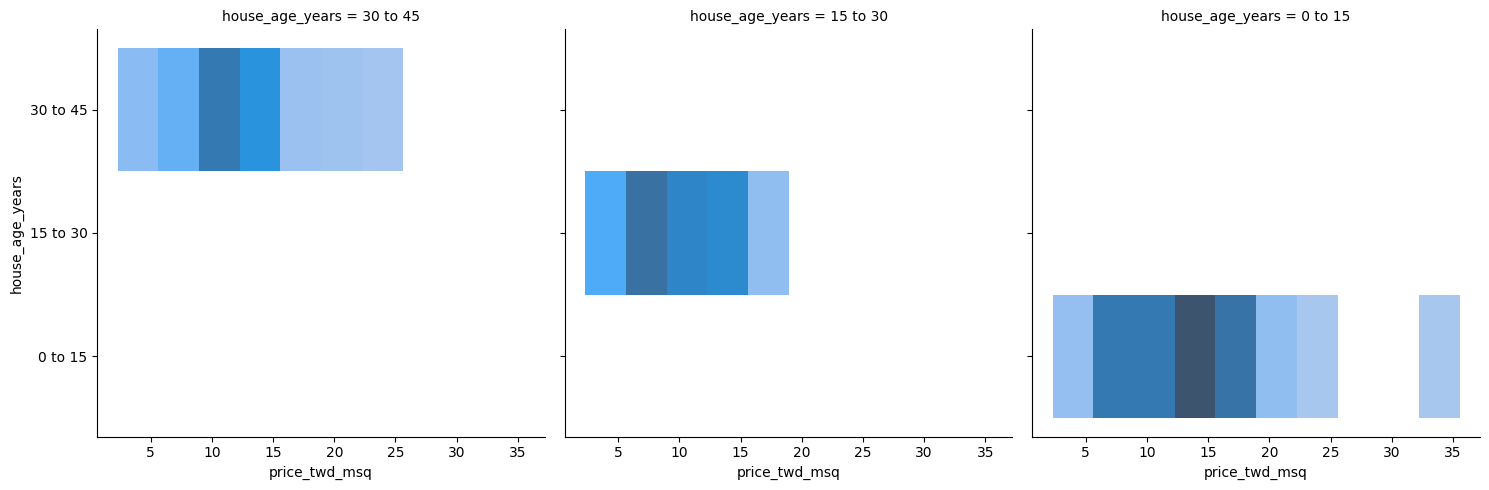

In [11]:
sns.displot(data=taiwan_real_estate,
            y='house_age_years',
            x='price_twd_msq',
            bins=10,
            col='house_age_years')
plt.show()


In [13]:
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")['price_twd_msq'].mean()
mean_price_by_age

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64

In [15]:
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0',data=taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
